In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
pf = pd.read_csv('CarPrice.csv')
pf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
x = pf['horsepower']
y = pf['price']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=30,test_size=0.3)

In [8]:
model = LinearRegression()

In [11]:
x_train = np.array(x_train).reshape(-1, 1)
model.fit(x_train,y_train)

LinearRegression()

In [12]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Training score:", model.score(x_train, y_train))

Coefficients: [168.99141878]
Intercept: -4293.12742482264
Training score: 0.6464181650757458


In [14]:
x_test = np.array(x_test).reshape(-1,1)

In [15]:
y_pred = model.predict(x_test)

In [16]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)


In [17]:
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 score:",r2)

MAE: 3192.9486705854506
MSE: 20004812.25432159
RMSE: 4472.673949028879
R2 score: 0.6668949584669217


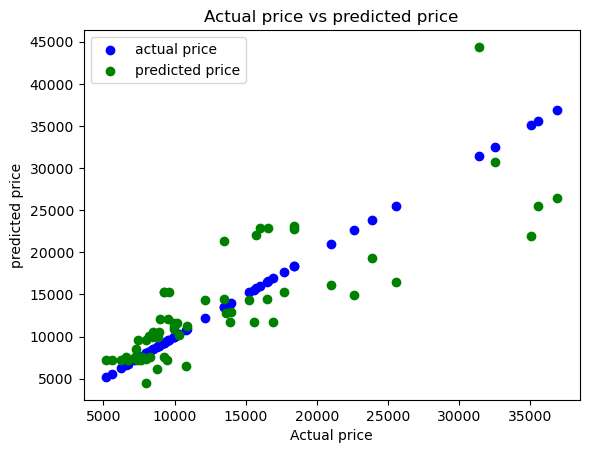

In [18]:
plt.scatter(y_test, y_test ,color = 'blue',label = 'actual price')
plt.scatter(y_test, y_pred ,color = 'green',label = 'predicted price')
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.legend()
plt.show()